In [27]:
import sys
import os
src = os.path.dirname(os.path.abspath(''))
if src not in sys.path: sys.path.append(src)

In [28]:
import pandas as pd
from matplotlib import pyplot as plt
from src.db.database import connect

## 6 - What is the average number of Commits in Data Science projects?
In this section we will investigate commits and how often are they made.

In [29]:
with connect() as session:
    commits = pd.read_sql_table("commits", session.connection())
    print(f"In all repositories {len(commits)} commits were found")

In all repositories 4248 commits were found


#### Average of Commits

In [30]:
commits_per_repository = commits.repository_id.value_counts()\
    .rename_axis('repository_id').to_frame("commits").reset_index(drop=False).sort_values(by='repository_id')
average =  commits_per_repository.commits.mean()
print(f"Considering all {len(commits_per_repository)} repositories, "
      f"on average each repository has {average} commits.")

Considering all 10 repositories, on average each repository has 424.8 commits.


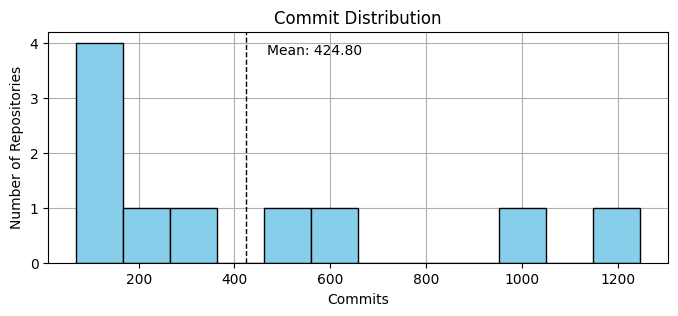

In [31]:
fig1, ax1 = plt.subplots(figsize=(8,3))
commits_per_repository.commits.hist(ax=ax1, bins= 12, color='skyblue', edgecolor='k',zorder=2)
plt.title('Commit Distribution')
plt.xlabel('Commits')
plt.ylabel('Number of Repositories');
plt.axvline(average, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(average*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(average));

### 6.1 - How often are commits made?
In this section we investigate how long it takes from one commit to another.

In [32]:
repositories_with_commits = commits_per_repository
frequency = []
frequency_days = []
for index, repository in repositories_with_commits.iterrows():
    repository_id = repository.repository_id
    current_repository_commits = commits[commits.repository_id==repository_id].sort_values(by="date")
    durations = []
    previous = None
    for index, commit in current_repository_commits.iterrows():
        if not previous:
            previous  = commit.date
        else:
            duration = commit.date - previous
            durations.append(duration)
            previous = commit.date
    durations = pd.DataFrame(durations, columns=["timedelta"])
    mean = durations.timedelta.mean()
    frequency.append(mean)
    frequency_days.append(mean.days)
repositories_with_commits['frequency_timedelta'] = frequency
repositories_with_commits['frequency_days'] = frequency_days
all_mean = repositories_with_commits.frequency_timedelta.mean()
print(f"Considering all {len(commits_per_repository)} repositories, "
      f"we frequency average of commits {all_mean}.")

Considering all 10 repositories, we frequency average of commits 8 days 02:05:20.586488940 with a standart deviation of 8 days 21:59:08.775057962.


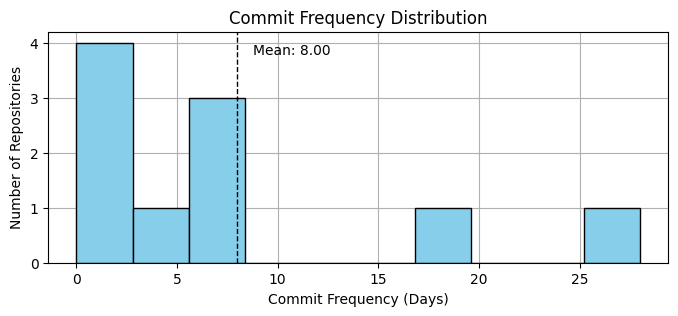

In [33]:
fig2, ax2 = plt.subplots(figsize=(8,3))
mean = all_mean.days
repositories_with_commits.frequency_days.hist(ax=ax2, color='skyblue', edgecolor='k',zorder=2)
plt.title('Commit Frequency Distribution')
plt.xlabel('Commit Frequency (Days)')
plt.ylabel('Number of Repositories');
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(mean*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(mean));